In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


In [181]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)


In [182]:
for company, company_name in zip(company_list, tech_list):
    company["company_name"] = company_name # needed to unzip data at first run
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-10-25,3347.800049,3297.699951,3335.000000,3320.370117,2226000.0,3320.370117,AMAZON
2021-10-26,3416.120117,3343.979980,3349.510010,3376.070068,2698300.0,3376.070068,AMAZON
2021-10-27,3437.000000,3371.449951,3388.000000,3392.489990,2702200.0,3392.489990,AMAZON
2021-10-28,3479.000000,3386.000000,3402.100098,3446.570068,5708700.0,3446.570068,AMAZON
2021-10-29,3374.820068,3273.320068,3300.020020,3372.429932,6469500.0,3372.429932,AMAZON
2021-11-01,3375.860107,3292.020020,3361.800049,3318.110107,3608900.0,3318.110107,AMAZON
2021-11-02,3331.120117,3283.550049,3315.010010,3312.750000,2627600.0,3312.750000,AMAZON
2021-11-03,3394.919922,3297.520020,3309.000000,3384.000000,3397200.0,3384.000000,AMAZON
2021-11-04,3498.629883,3365.000000,3370.000000,3477.000000,5353000.0,3477.000000,AMAZON


In [183]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,135.923108,133.208725,134.568527,134.619641,9.097489e+07,134.129560
std,10.641975,10.716166,10.672052,10.730150,2.865521e+07,10.867748
min,115.849998,112.589996,113.910004,113.849998,4.639770e+07,113.152443
25%,127.059998,124.635002,125.400002,125.895000,7.130415e+07,125.365356
50%,134.660004,131.809998,133.509995,133.190002,8.632600e+07,132.717178
75%,146.379997,143.665001,144.415001,145.459999,1.053668e+08,145.124352
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.461655


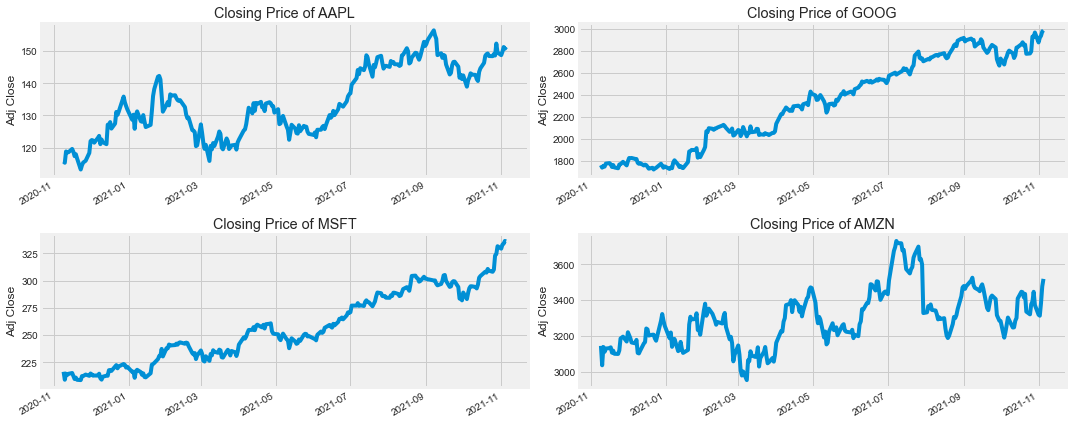

In [184]:
# historical stock prices

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


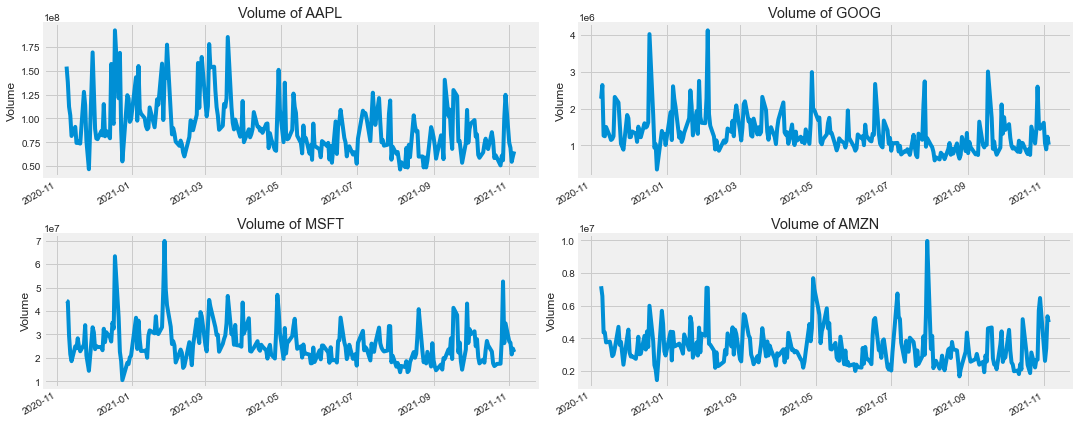

In [185]:
# Plot the total volume of stock traded each day 

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tech_list[i - 1]}")

plt.tight_layout()


Moving avarage of the vairous stocks:

In [186]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [187]:
print (GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


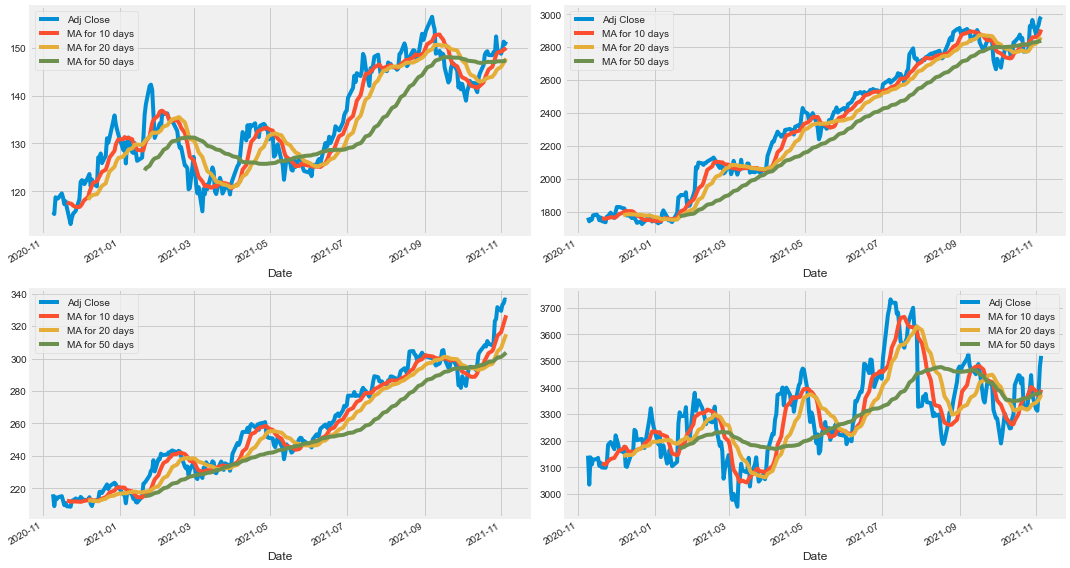

In [188]:
fig, exes = plt.subplots(nrows=2, ncols=2,)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=exes[0,0])

GOOG[['Adj Close', "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=exes[0,1])

MSFT[['Adj Close', "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=exes[1,0])

AMZN[['Adj Close', "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=exes[1,1])



fig.tight_layout()

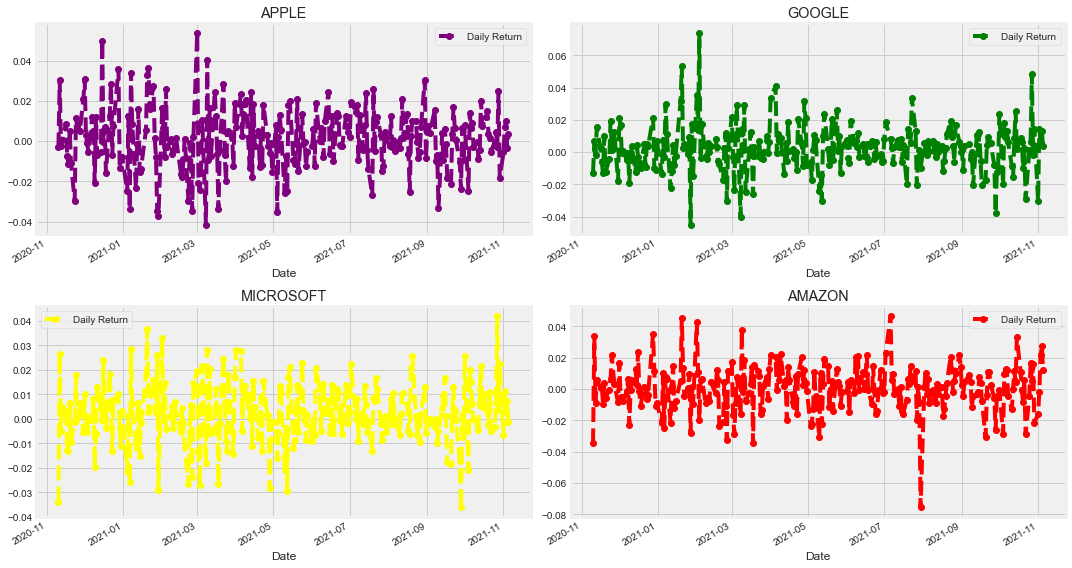

In [189]:
# What was the daily avarage return of the stocks?

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', color="purple")
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', color="green")
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', color='yellow')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', color="red")
axes[1,1].set_title('AMAZON')

fig.tight_layout()

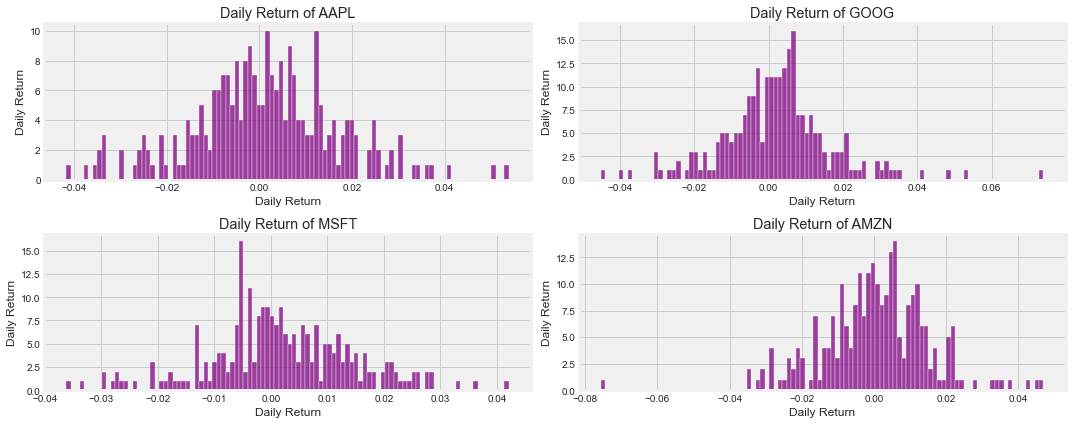

In [190]:
# ensure that all NA values have been removed by using dropna() as seaborn will now be read the data

plt.figure(figsize=(15, 6))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')

    plt.ylabel('Daily Return')

    plt.title(f"Daily Return of {tech_list[i - 1]}")


plt.tight_layout()

What was the corrlation between diffrent stocks closing price?



In [191]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-09,115.607307,1763.000000,216.404282,3143.739990
2020-11-10,115.259445,1740.390015,209.091385,3035.020020
2020-11-11,118.757881,1752.709961,214.581009,3137.389893
2020-11-12,118.479599,1749.839966,213.481094,3110.280029
2020-11-13,118.529289,1777.020020,214.541367,3128.810059


In [192]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-09,NaN,NaN,NaN,NaN
2020-11-10,-0.003009,-0.012825,-0.033793,-0.034583
2020-11-11,0.030353,0.007079,0.026255,0.033730
2020-11-12,-0.002343,-0.001637,-0.005126,-0.008641
2020-11-13,0.000419,0.015533,0.004967,0.005958


C:\Users\44786\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


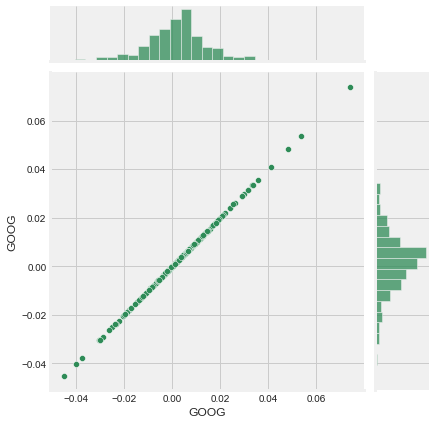

In [193]:
# comparing Google to itself should show a leniar relationship
# 

sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\44786\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


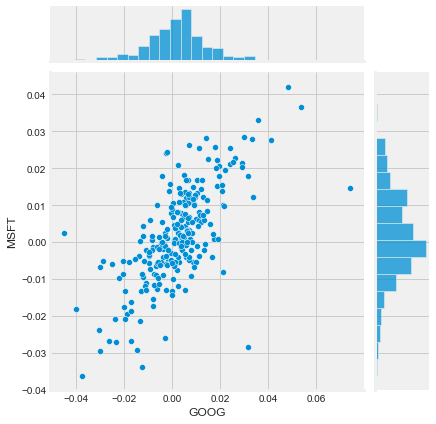

In [194]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

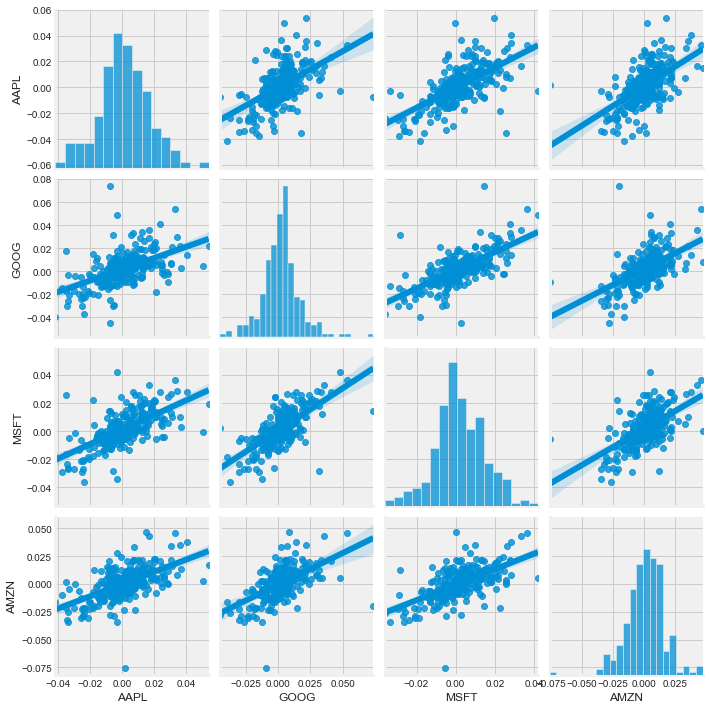

In [195]:
sns.pairplot(tech_rets, kind='reg', color="purple")

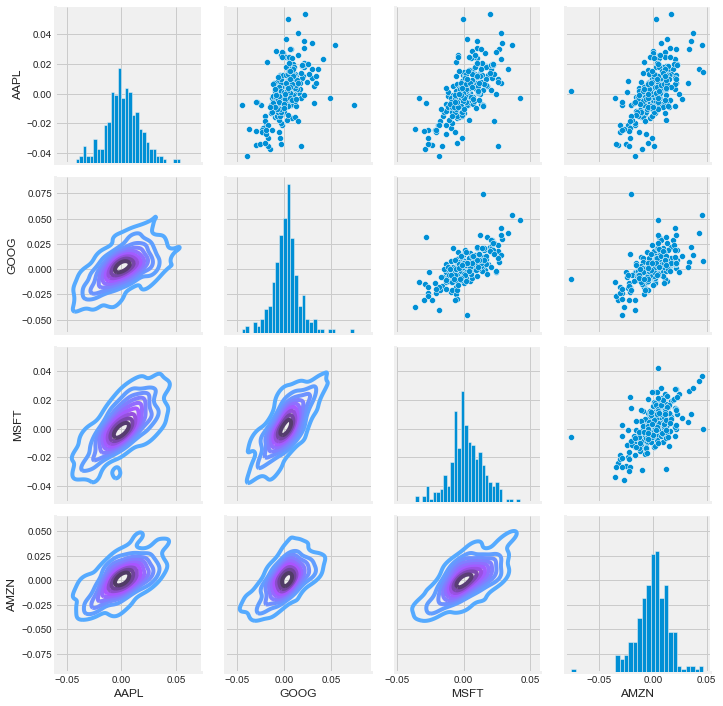

In [198]:
return_fig = sns.PairGrid(tech_rets.dropna())


return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_upper(sns.scatterplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)